In [1]:
import os
import pandas as pd
import requests
from bs4 import BeautifulSoup
from time import sleep
import os
import datetime
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys

In [2]:
options = Options()
options.binary_location = (r"C:\Users\assis\Downloads\MASAI DBMS\Google colab file\COLAB_File\geckodriver.exe")

In [3]:
driver = webdriver.Firefox()

Error sending stats to Plausible: error sending request for url (https://plausible.io/api/event): operation timed out


In [4]:
import requests

In [8]:
driver.get("https://www.1mg.com/categories/featured/trending-now-707")
name=[]
size_bottle=[]
mrp_bottle=[]
sell_price_bottle=[]
url=[]

#name
for i in driver.find_elements(By.CLASS_NAME,"style__pro-title___2QwJy"):
    name.append(i.text)
    
# size of the bottle
for i in driver.find_elements(By.CLASS_NAME,"style__pack-size___2JQG7"):
    size_bottle.append(i.text)
    

#mrp of bottle
for i in driver.find_elements(By.CLASS_NAME,"style__discount-price___25Bya"):
    mrp_bottle.append(i.text.replace('₹', ''))
    
# selling_price_of_bottle

for i in driver.find_elements(By.CLASS_NAME,"style__price-tag___cOxYc"):
    sell_price_bottle.append(i.text.replace('MRP', '').replace('₹', ''))

# URL

for i in driver.find_elements(By.CLASS_NAME,"style__product-link___UB_67"):
    url.append(i.get_attribute('href'))
    

#min_length
min_length = min(len(name), len(size_bottle), len(mrp_bottle), len(sell_price_bottle))

final_dict = {'name': name[:min_length], 'size_bottle': size_bottle[:min_length],
              'mrp_bottle': mrp_bottle[:min_length], 'sell_price_bottle': sell_price_bottle[:min_length],'url':url[:min_length]}

df1 = pd.DataFrame(final_dict)
df1



,name,size_bottle,mrp_bottle,sell_price_bottle,url
0,Myupchar Ayurveda Prajnas Extracts Based Vegan...,bottle of 60 vegicaps,999,979,https://www.1mg.com/otc/myupchar-ayurveda-praj...
1,Zingavita Multivitamin Tablet for Women with I...,bottle of 120 tablets,799,399,https://www.1mg.com/otc/zingavita-multivitamin...
2,Protinex High Quality Protein | Nutritional Dr...,Tin of 400 gm Powder,675,585,https://www.1mg.com/otc/protinex-high-quality-...
3,Dr. Vaidya's Shilajit Gold Capsule (30 Each),box of 1 Bottle,750,590,https://www.1mg.com/otc/dr.-vaidya-s-shilajit-...
4,"Zandu Chyavanprash Avaleha | For Immunity, Str...",jar of 900 gm Paste,450,360,https://www.1mg.com/otc/zandu-chyavanprash-ava...
5,The Face Shop The Face Shop The Therapy Vegan ...,tube of 50 ml Serum,2199,1759,https://www.1mg.com/otc/the-face-shop-the-face...
6,Neuherbs T7 Ultra Testosterone Booster Veggie ...,bottle of 60 capsules,799,499,https://www.1mg.com/otc/neuherbs-t7-ultra-test...
7,Wellbeing Nutrition Melts into Testo Power wit...,box of 30 disintegrating strips,649,610,https://www.1mg.com/otc/wellbeing-nutrition-me...
8,Myupchar Ayurveda Urjas Shilajit Resin,jar of 15 gm Resin,1299,799,https://www.1mg.com/otc/myupchar-ayurveda-urja...
9,Mederma PM Intensive Overnight Scar Cream,tube of 10 gm Cream,485,483,https://www.1mg.com/otc/mederma-pm-intensive-o...


# table 2

In [9]:
import requests



brand_name = []

rating_star = []
rating = []
review = []

driver = webdriver.Firefox()

for link in url:
    driver.get(link)
    
    # brand name
    for i in driver.find_elements(By.CLASS_NAME, "ProductTitle__marketer___7Wsj9"):
        brand_name.append(i.text)
    
    
    # rating_star
    for i in driver.find_elements(By.CLASS_NAME, 'RatingDisplay__ratings-container___3oUuo'):
        rating_star.append(i.text)
    
    # rating
    for i in driver.find_elements(By.CLASS_NAME, 'RatingDisplay__ratings-header___ZNj5b'):
        rating.append(i.text)
    

    # review
    review_elements = driver.find_elements(By.CLASS_NAME, 'ReviewCards__review-description___WoLdZ')

    # Iterate through each review element
    for element in review_elements:
    # Check if the review text is available
        if element.text.strip():  # If the text is not empty
            review.append(element.text)
        else:
            review.append("NA")  # Fill missing review with "NA"

    

driver.quit()  # Close the WebDriver

min_length = min(len(brand_name), len(rating_star), len(rating), len(review))

data = {
    'name': name[:min_length],
    'Brand Name': brand_name[:min_length],
   
    'Rating Star': rating_star[:min_length],
    'Rating': rating[:min_length],
    'Review': review[:min_length]
}

df2 = pd.DataFrame(data)
df2

,name,Brand Name,Rating Star,Rating,Review
0,Myupchar Ayurveda Prajnas Extracts Based Vegan...,Doctorvahini Private Limited,4.4,337 Ratings & 43 Reviews,Multivitamin tablets are good for maintaining ...
1,Zingavita Multivitamin Tablet for Women with I...,Adthera Consumer Brands Pvt Ltd,4.4,1363 Ratings & 224 Reviews,its good for women I had purchased for my mom....
2,Protinex High Quality Protein | Nutritional Dr...,Nutricia International Pvt Ltd,4.1,19 Ratings & 1 Reviews,This medicine is very amazing I really like it .
3,Dr. Vaidya's Shilajit Gold Capsule (30 Each),Herbolab India Pvt Ltd,4.4,754 Ratings & 142 Reviews,NA
4,"Zandu Chyavanprash Avaleha | For Immunity, Str...",Zandu Pharmaceutical Works Ltd,3.7,35 Ratings & 5 Reviews,NA
5,The Face Shop The Face Shop The Therapy Vegan ...,LG Household & Health Care Ltd.,4.1,54 Ratings & 4 Reviews,NA
6,Neuherbs T7 Ultra Testosterone Booster Veggie ...,Global Healthfit Retail India,3.9,16 Ratings,NA
7,Wellbeing Nutrition Melts into Testo Power wit...,Nutritionalab Pvt Ltd,4.1,122 Ratings & 7 Reviews,NA
8,Myupchar Ayurveda Urjas Shilajit Resin,Doctorvahini Private Limited,4.5,950 Ratings & 110 Reviews,NA
9,Mederma PM Intensive Overnight Scar Cream,Win-Medicare Pvt Ltd,4.5,176 Ratings & 20 Reviews,NA


In [10]:
df1.to_csv('table1_mg.csv', index=False)

In [11]:
df2.to_csv('table2_mg.csv', index=False)

In [12]:
# Open the CSV file using the default application
os.system('start excel.exe {}'.format('table1_mg.csv'))

0

In [13]:
os.system('start excel.exe {}'.format('table2_mg.csv'))

0

In [14]:
# To merge based on a common column, you can use the merge function instead
merged_df = pd.merge(df1, df2, on='name', how='inner')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_file.csv', index=False)

In [15]:
merged_df

,name,size_bottle,mrp_bottle,sell_price_bottle,url,Brand Name,Rating Star,Rating,Review
0,Myupchar Ayurveda Prajnas Extracts Based Vegan...,bottle of 60 vegicaps,999,979,https://www.1mg.com/otc/myupchar-ayurveda-praj...,Doctorvahini Private Limited,4.4,337 Ratings & 43 Reviews,Multivitamin tablets are good for maintaining ...
1,Zingavita Multivitamin Tablet for Women with I...,bottle of 120 tablets,799,399,https://www.1mg.com/otc/zingavita-multivitamin...,Adthera Consumer Brands Pvt Ltd,4.4,1363 Ratings & 224 Reviews,its good for women I had purchased for my mom....
2,Protinex High Quality Protein | Nutritional Dr...,Tin of 400 gm Powder,675,585,https://www.1mg.com/otc/protinex-high-quality-...,Nutricia International Pvt Ltd,4.1,19 Ratings & 1 Reviews,This medicine is very amazing I really like it .
3,Dr. Vaidya's Shilajit Gold Capsule (30 Each),box of 1 Bottle,750,590,https://www.1mg.com/otc/dr.-vaidya-s-shilajit-...,Herbolab India Pvt Ltd,4.4,754 Ratings & 142 Reviews,NA
4,"Zandu Chyavanprash Avaleha | For Immunity, Str...",jar of 900 gm Paste,450,360,https://www.1mg.com/otc/zandu-chyavanprash-ava...,Zandu Pharmaceutical Works Ltd,3.7,35 Ratings & 5 Reviews,NA
5,The Face Shop The Face Shop The Therapy Vegan ...,tube of 50 ml Serum,2199,1759,https://www.1mg.com/otc/the-face-shop-the-face...,LG Household & Health Care Ltd.,4.1,54 Ratings & 4 Reviews,NA
6,Neuherbs T7 Ultra Testosterone Booster Veggie ...,bottle of 60 capsules,799,499,https://www.1mg.com/otc/neuherbs-t7-ultra-test...,Global Healthfit Retail India,3.9,16 Ratings,NA
7,Wellbeing Nutrition Melts into Testo Power wit...,box of 30 disintegrating strips,649,610,https://www.1mg.com/otc/wellbeing-nutrition-me...,Nutritionalab Pvt Ltd,4.1,122 Ratings & 7 Reviews,NA
8,Wellbeing Nutrition Melts into Testo Power wit...,box of 30 disintegrating strips,649,610,https://www.1mg.com/otc/wellbeing-nutrition-me...,Nutritionalab Pvt Ltd,4.5,1517 Ratings & 362 Reviews,NA
9,Wellbeing Nutrition Melts into Testo Power wit...,box of 30 disintegrating strips,649,610,https://www.1mg.com/otc/wellbeing-nutrition-me...,Nutritionalab Pvt Ltd,4.1,122 Ratings & 7 Reviews,NA


In [34]:
merged_df.isnull().sum()

name                 0
size_bottle          0
mrp_bottle           0
sell_price_bottle    0
url                  0
Brand Name           0
Rating Star          0
Rating               0
Review               0
dtype: int64

In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               46 non-null     object
 1   size_bottle        46 non-null     object
 2   mrp_bottle         46 non-null     object
 3   sell_price_bottle  46 non-null     object
 4   url                46 non-null     object
 5   Brand Name         46 non-null     object
 6   Rating Star        46 non-null     object
 7   Rating             46 non-null     object
 8   Review             46 non-null     object
dtypes: object(9)
memory usage: 3.4+ KB


In [23]:

merged_df['Rating Star'] = merged_df['Rating Star'].str.replace('[^\d.]', '').astype(float)


In [24]:
merged_df

,name,size_bottle,mrp_bottle,sell_price_bottle,url,Brand Name,Rating Star,Rating,Review
0,Myupchar Ayurveda Prajnas Extracts Based Vegan...,bottle of 60 vegicaps,999.00,979.0,https://www.1mg.com/otc/myupchar-ayurveda-praj...,Doctorvahini Private Limited,4.4,337 Ratings & 43 Reviews,Multivitamin tablets are good for maintaining ...
1,Zingavita Multivitamin Tablet for Women with I...,bottle of 120 tablets,799.00,399.0,https://www.1mg.com/otc/zingavita-multivitamin...,Adthera Consumer Brands Pvt Ltd,4.4,1363 Ratings & 224 Reviews,its good for women I had purchased for my mom....
2,Protinex High Quality Protein | Nutritional Dr...,Tin of 400 gm Powder,675.00,585.0,https://www.1mg.com/otc/protinex-high-quality-...,Nutricia International Pvt Ltd,4.1,19 Ratings & 1 Reviews,This medicine is very amazing I really like it .
3,Dr. Vaidya's Shilajit Gold Capsule (30 Each),box of 1 Bottle,750.00,590.0,https://www.1mg.com/otc/dr.-vaidya-s-shilajit-...,Herbolab India Pvt Ltd,4.4,754 Ratings & 142 Reviews,NA
4,"Zandu Chyavanprash Avaleha | For Immunity, Str...",jar of 900 gm Paste,450.00,360.0,https://www.1mg.com/otc/zandu-chyavanprash-ava...,Zandu Pharmaceutical Works Ltd,3.7,35 Ratings & 5 Reviews,NA
5,The Face Shop The Face Shop The Therapy Vegan ...,tube of 50 ml Serum,2199.00,1759.0,https://www.1mg.com/otc/the-face-shop-the-face...,LG Household & Health Care Ltd.,4.1,54 Ratings & 4 Reviews,NA
6,Neuherbs T7 Ultra Testosterone Booster Veggie ...,bottle of 60 capsules,799.00,499.0,https://www.1mg.com/otc/neuherbs-t7-ultra-test...,Global Healthfit Retail India,3.9,16 Ratings,NA
7,Wellbeing Nutrition Melts into Testo Power wit...,box of 30 disintegrating strips,649.00,610.0,https://www.1mg.com/otc/wellbeing-nutrition-me...,Nutritionalab Pvt Ltd,4.1,122 Ratings & 7 Reviews,NA
8,Wellbeing Nutrition Melts into Testo Power wit...,box of 30 disintegrating strips,649.00,610.0,https://www.1mg.com/otc/wellbeing-nutrition-me...,Nutritionalab Pvt Ltd,4.5,1517 Ratings & 362 Reviews,NA
9,Wellbeing Nutrition Melts into Testo Power wit...,box of 30 disintegrating strips,649.00,610.0,https://www.1mg.com/otc/wellbeing-nutrition-me...,Nutritionalab Pvt Ltd,4.1,122 Ratings & 7 Reviews,NA


In [25]:
merged_df.dtypes

name                  object
size_bottle           object
mrp_bottle           float64
sell_price_bottle    float64
url                   object
Brand Name            object
Rating Star          float64
Rating                object
Review                object
dtype: object

In [28]:
merged_df[['Rating_Number', 'Review_Number']] = merged_df['Rating'].str.extract('(\d+) Ratings & (\d+) Reviews')

# Convert the extracted numbers to integers
merged_df['Rating_Number'] = merged_df['Rating_Number'].astype(float)
merged_df['Review_Number'] = merged_df['Review_Number'].astype(float)

# Drop the original Rating column if needed
# df.drop(columns=['Rating'], inplace=True)

merged_df

,name,size_bottle,mrp_bottle,sell_price_bottle,url,Brand Name,Rating Star,Rating,Review,Rating_Number,Review_Number
0,Myupchar Ayurveda Prajnas Extracts Based Vegan...,bottle of 60 vegicaps,999.00,979.0,https://www.1mg.com/otc/myupchar-ayurveda-praj...,Doctorvahini Private Limited,4.4,337 Ratings & 43 Reviews,Multivitamin tablets are good for maintaining ...,337.0,43.0
1,Zingavita Multivitamin Tablet for Women with I...,bottle of 120 tablets,799.00,399.0,https://www.1mg.com/otc/zingavita-multivitamin...,Adthera Consumer Brands Pvt Ltd,4.4,1363 Ratings & 224 Reviews,its good for women I had purchased for my mom....,1363.0,224.0
2,Protinex High Quality Protein | Nutritional Dr...,Tin of 400 gm Powder,675.00,585.0,https://www.1mg.com/otc/protinex-high-quality-...,Nutricia International Pvt Ltd,4.1,19 Ratings & 1 Reviews,This medicine is very amazing I really like it .,19.0,1.0
3,Dr. Vaidya's Shilajit Gold Capsule (30 Each),box of 1 Bottle,750.00,590.0,https://www.1mg.com/otc/dr.-vaidya-s-shilajit-...,Herbolab India Pvt Ltd,4.4,754 Ratings & 142 Reviews,NA,754.0,142.0
4,"Zandu Chyavanprash Avaleha | For Immunity, Str...",jar of 900 gm Paste,450.00,360.0,https://www.1mg.com/otc/zandu-chyavanprash-ava...,Zandu Pharmaceutical Works Ltd,3.7,35 Ratings & 5 Reviews,NA,35.0,5.0
5,The Face Shop The Face Shop The Therapy Vegan ...,tube of 50 ml Serum,2199.00,1759.0,https://www.1mg.com/otc/the-face-shop-the-face...,LG Household & Health Care Ltd.,4.1,54 Ratings & 4 Reviews,NA,54.0,4.0
6,Neuherbs T7 Ultra Testosterone Booster Veggie ...,bottle of 60 capsules,799.00,499.0,https://www.1mg.com/otc/neuherbs-t7-ultra-test...,Global Healthfit Retail India,3.9,16 Ratings,NA,NaN,NaN
7,Wellbeing Nutrition Melts into Testo Power wit...,box of 30 disintegrating strips,649.00,610.0,https://www.1mg.com/otc/wellbeing-nutrition-me...,Nutritionalab Pvt Ltd,4.1,122 Ratings & 7 Reviews,NA,122.0,7.0
8,Wellbeing Nutrition Melts into Testo Power wit...,box of 30 disintegrating strips,649.00,610.0,https://www.1mg.com/otc/wellbeing-nutrition-me...,Nutritionalab Pvt Ltd,4.5,1517 Ratings & 362 Reviews,NA,1517.0,362.0
9,Wellbeing Nutrition Melts into Testo Power wit...,box of 30 disintegrating strips,649.00,610.0,https://www.1mg.com/otc/wellbeing-nutrition-me...,Nutritionalab Pvt Ltd,4.1,122 Ratings & 7 Reviews,NA,122.0,7.0


In [29]:
merged_df.dtypes

name                  object
size_bottle           object
mrp_bottle           float64
sell_price_bottle    float64
url                   object
Brand Name            object
Rating Star          float64
Rating                object
Review                object
Rating_Number        float64
Review_Number        float64
dtype: object

In [30]:
merged_df.drop(columns=['Rating'], inplace=True)

In [34]:
merged_df[['Review']]

,Review
0,Multivitamin tablets are good for maintaining ...
1,its good for women I had purchased for my mom....
2,This medicine is very amazing I really like it .
3,NA
4,NA
5,NA
6,NA
7,NA
8,NA
9,NA


In [67]:
merged_df=pd.read_csv(r"C:\Users\assis\Downloads\MASAI DBMS\python file shared by maam\merged_file.csv")

In [32]:
merged_df.to_csv('merged_file.csv', index=False)

# Step 1 - Import libraries and load dataset

In [68]:
# import libraries
import pandas as pd

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer


# download nltk corpus (first time only)
import nltk

nltk.download('all')








[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat

[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package vader_lexicon is already up-to-date!
[nltk_data]    | Downloading package verbnet to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package verbnet is already up-to-date!
[nltk_data]    | Downloading package verbnet3 to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package verbnet3 is already up-to-date!
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package webtext is already up-to-date!
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wmt15_eval is already up-to-date!
[nltk_data]    | Downloadin

True

In [69]:
merged_df.sample()

,name,size_bottle,mrp_bottle,sell_price_bottle,url,Brand Name,Rating Star,Review,Rating_Number,Review_Number,positive
18,ORSL Electrolyte Drink Orange,packet of 200 ml Liquid,45.0,39.3,https://www.1mg.com/otc/orsl-electrolyte-drink...,JNTL Consumer Health (India) Pvt. Ltd.,4.4,Tasty like Bournvita with milk,1344.0,260.0,0


In [76]:
merged_df.dtypes

name                  object
size_bottle           object
mrp_bottle           float64
sell_price_bottle    float64
url                   object
Brand Name            object
Rating Star          float64
Review                object
Rating_Number        float64
Review_Number        float64
positive               int64
dtype: object

In [77]:
merged_df[['Review']]

,Review
0,Multivitamin tablets are good for maintaining ...
1,its good for women I had purchased for my mom....
2,This medicine is very amazing I really like it .
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [79]:
merged_df.dropna(subset=['Review'], inplace=True)

In [80]:
merged_df

,name,size_bottle,mrp_bottle,sell_price_bottle,url,Brand Name,Rating Star,Review,Rating_Number,Review_Number,positive
0,Myupchar Ayurveda Prajnas Extracts Based Vegan...,bottle of 60 vegicaps,999.00,979.0,https://www.1mg.com/otc/myupchar-ayurveda-praj...,Doctorvahini Private Limited,4.4,Multivitamin tablets are good for maintaining ...,337.0,43.0,1
1,Zingavita Multivitamin Tablet for Women with I...,bottle of 120 tablets,799.00,399.0,https://www.1mg.com/otc/zingavita-multivitamin...,Adthera Consumer Brands Pvt Ltd,4.4,its good for women I had purchased for my mom....,1363.0,224.0,1
2,Protinex High Quality Protein | Nutritional Dr...,Tin of 400 gm Powder,675.00,585.0,https://www.1mg.com/otc/protinex-high-quality-...,Nutricia International Pvt Ltd,4.1,This medicine is very amazing I really like it .,19.0,1.0,1
13,Sova Plug The Flow Sachet for Diarrhoea & Upse...,jar of 15 Sachets,599.00,515.0,https://www.1mg.com/otc/sova-plug-the-flow-sac...,Wednesday Health India Pvt Ltd,4.4,Taste and quality,3062.0,514.0,0
14,Plum Mandarin & Vitamin C 15% Face Serum | Fra...,bottle of 30 ml Serum,790.00,695.0,https://www.1mg.com/otc/plum-mandarin-vitamin-...,Pureplay Skin Sciences Pvt. Ltd.,4.1,Too much sweet in taste,122.0,7.0,0
16,Plum Mandarin & Vitamin C 15% Face Serum | Fra...,bottle of 30 ml Serum,790.00,695.0,https://www.1mg.com/otc/plum-mandarin-vitamin-...,Pureplay Skin Sciences Pvt. Ltd.,4.1,Too much sweet in taste,122.0,7.0,0
18,ORSL Electrolyte Drink Orange,packet of 200 ml Liquid,45.00,39.3,https://www.1mg.com/otc/orsl-electrolyte-drink...,JNTL Consumer Health (India) Pvt. Ltd.,4.4,Tasty like Bournvita with milk,1344.0,260.0,0
24,i-Can One Step Pregnancy Test Kit,box of 1 Test Kit,55.00,39.6,https://www.1mg.com/otc/i-can-one-step-pregnan...,Piramal Enterprises Ltd,4.3,Good results,700.0,68.0,1
25,Mamaearth Onion Shampoo for Healthy Hair | SLS...,pump bottle of 250 ml Shampoo,349.00,314.0,https://www.1mg.com/otc/mamaearth-onion-shampo...,Honasa Consumer Pvt Ltd,4.3,Like the taste,238.0,36.0,1
26,i-Know Ovulation Testing Strip Kit,packet of 5 Test Kits,549.00,417.0,https://www.1mg.com/otc/i-know-ovulation-testi...,Piramal Enterprises Ltd,4.5,Received as desired Thanks,749.0,60.0,1


# Step 2 - Preprocess text

In [81]:
# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text.lower())




    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]




    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]




    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# apply the function df


In [82]:
merged_df['Review'] = merged_df['Review'].apply(preprocess_text)


# Step 3 - NLTK Sentiment Analyzer

In [83]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment

In [84]:
# apply get_sentiment function

merged_df['sentiment'] = merged_df['Review'].apply(get_sentiment)

merged_df

,name,size_bottle,mrp_bottle,sell_price_bottle,url,Brand Name,Rating Star,Review,Rating_Number,Review_Number,positive,sentiment
0,Myupchar Ayurveda Prajnas Extracts Based Vegan...,bottle of 60 vegicaps,999.00,979.0,https://www.1mg.com/otc/myupchar-ayurveda-praj...,Doctorvahini Private Limited,4.4,multivitamin tablet good maintaining good heal...,337.0,43.0,1,1
1,Zingavita Multivitamin Tablet for Women with I...,bottle of 120 tablets,799.00,399.0,https://www.1mg.com/otc/zingavita-multivitamin...,Adthera Consumer Brands Pvt Ltd,4.4,good woman purchased mom . really liked result,1363.0,224.0,1,1
2,Protinex High Quality Protein | Nutritional Dr...,Tin of 400 gm Powder,675.00,585.0,https://www.1mg.com/otc/protinex-high-quality-...,Nutricia International Pvt Ltd,4.1,medicine amazing really like .,19.0,1.0,1,1
13,Sova Plug The Flow Sachet for Diarrhoea & Upse...,jar of 15 Sachets,599.00,515.0,https://www.1mg.com/otc/sova-plug-the-flow-sac...,Wednesday Health India Pvt Ltd,4.4,taste quality,3062.0,514.0,0,0
14,Plum Mandarin & Vitamin C 15% Face Serum | Fra...,bottle of 30 ml Serum,790.00,695.0,https://www.1mg.com/otc/plum-mandarin-vitamin-...,Pureplay Skin Sciences Pvt. Ltd.,4.1,much sweet taste,122.0,7.0,0,1
16,Plum Mandarin & Vitamin C 15% Face Serum | Fra...,bottle of 30 ml Serum,790.00,695.0,https://www.1mg.com/otc/plum-mandarin-vitamin-...,Pureplay Skin Sciences Pvt. Ltd.,4.1,much sweet taste,122.0,7.0,0,1
18,ORSL Electrolyte Drink Orange,packet of 200 ml Liquid,45.00,39.3,https://www.1mg.com/otc/orsl-electrolyte-drink...,JNTL Consumer Health (India) Pvt. Ltd.,4.4,tasty like bournvita milk,1344.0,260.0,0,1
24,i-Can One Step Pregnancy Test Kit,box of 1 Test Kit,55.00,39.6,https://www.1mg.com/otc/i-can-one-step-pregnan...,Piramal Enterprises Ltd,4.3,good result,700.0,68.0,1,1
25,Mamaearth Onion Shampoo for Healthy Hair | SLS...,pump bottle of 250 ml Shampoo,349.00,314.0,https://www.1mg.com/otc/mamaearth-onion-shampo...,Honasa Consumer Pvt Ltd,4.3,like taste,238.0,36.0,1,1
26,i-Know Ovulation Testing Strip Kit,packet of 5 Test Kits,549.00,417.0,https://www.1mg.com/otc/i-know-ovulation-testi...,Piramal Enterprises Ltd,4.5,received desired thanks,749.0,60.0,1,1


# Step 4- Result

In [86]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(merged_df['positive'], merged_df['sentiment']))

[[ 4  4]
 [ 1 10]]


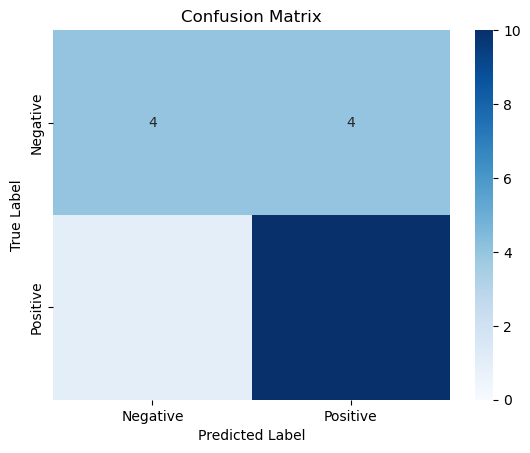

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the confusion matrix
conf_matrix = [[4, 4],
               [1, 10]]

# Define the labels for the confusion matrix
labels = ['Negative', 'Positive']

# Determine the maximum value in the confusion matrix
max_value = max(map(max, conf_matrix))

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels, vmin=0, vmax=max_value)

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


In [88]:
from sklearn.metrics import classification_report

print(classification_report(merged_df['positive'], merged_df['sentiment']))

              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.71      0.91      0.80        11

    accuracy                           0.74        19
   macro avg       0.76      0.70      0.71        19
weighted avg       0.75      0.74      0.72        19

